In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

In [131]:
nba = pd.read_csv('Tables/nba_2017_nba_players_with_salary.csv')
nba1 = pd.read_csv('Tables/nba_2016_2017_100.csv')
nba1.rename(columns={'PLAYER_NAME':'PLAYER'}, inplace=True)
nba2 = pd.merge(nba,nba1,how='left',on='PLAYER')

nba2.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE_x,MP,FG,FGA_x,FG%,3P,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS_y,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,15.0,45.0,5.0,"25,441,610,612,739",LeBron_James,KingJames,30.96,26.4,1.0,37.000
1,25,29,Mike Conley,PG,29,33.2,6.7,14.6,0.460,2.5,...,40.0,181.0,5.0,"2,011,441,610,612,760",Mike_Conley_Jr.,mconley11,26.54,20.5,1.0,0.342
2,67,78,Al Horford,C,30,32.3,5.6,11.8,0.473,1.3,...,70.0,149.0,5.0,"2,011,431,610,612,730",Al_Horford,al_horford,26.54,14.0,1.0,0.253
3,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,1.0,293.0,5.0,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1.0,4.500
4,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,9.0,253.0,5.0,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1.0,4.470


Graphing the "nba" dataset as jointplot, I want to label the top outliers (or top-n outliers) on the graph by their indexes from the dataframe. I iterated over the dataframes and place an annotation at the respective position given by the PPG and Salary column. I computed the residual (a point's distance from average line) for finding the outliers. 

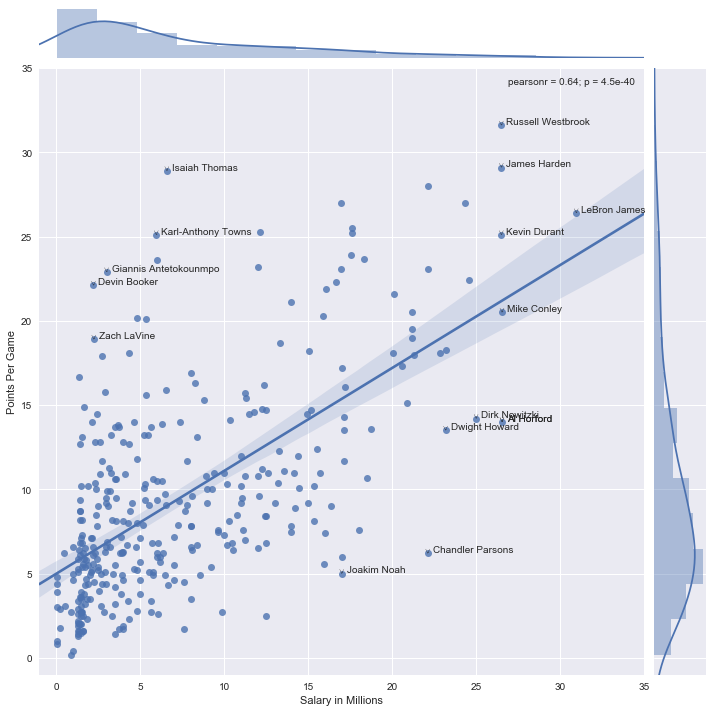

In [132]:
#create a 'resid' column that computes the residual for salary over points
model = sm.OLS(nba['SALARY_MILLIONS'], nba['POINTS'])
nba['resid'] = model.fit().resid
head = nba.sort_values(by=['resid'], ascending=[False]).head(5)
tail = nba.sort_values(by=['resid'], ascending=[False]).tail(5)
top_salary = nba.sort_values(by=['SALARY_MILLIONS'], ascending=[False]).head(6)


g = sns.jointplot(x='SALARY_MILLIONS', y='POINTS', kind='reg', 
              xlim=(-1, 35), ylim=(-1, 35), data=nba, size=10, ratio=10)
g.set_axis_labels('Salary in Millions', 'Points Per Game')

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(r['PLAYER'], xy=(r["SALARY_MILLIONS"], r["POINTS"]), 
                       xytext=(5,1) , textcoords ="offset points",
                      arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)
for row in top_salary.iterrows():
    ann(row)

g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off
plt.show()

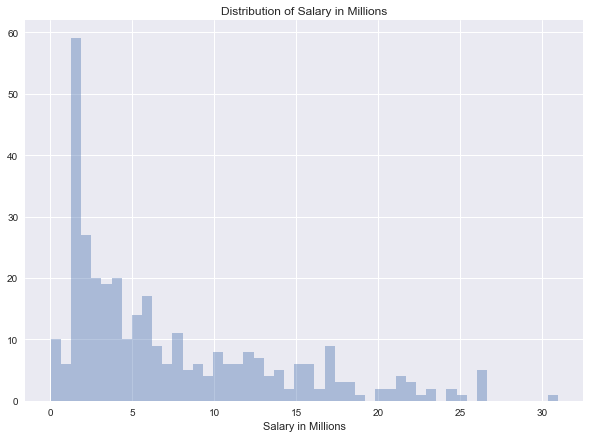

In [133]:
plt.figure(figsize=(10,7))
plt.xlabel('xlabel')
plt.title('Distribution of Salary in Millions')
sns.distplot(nba['SALARY_MILLIONS'], kde=False, bins=50, axlabel='Salary in Millions')
plt.show()

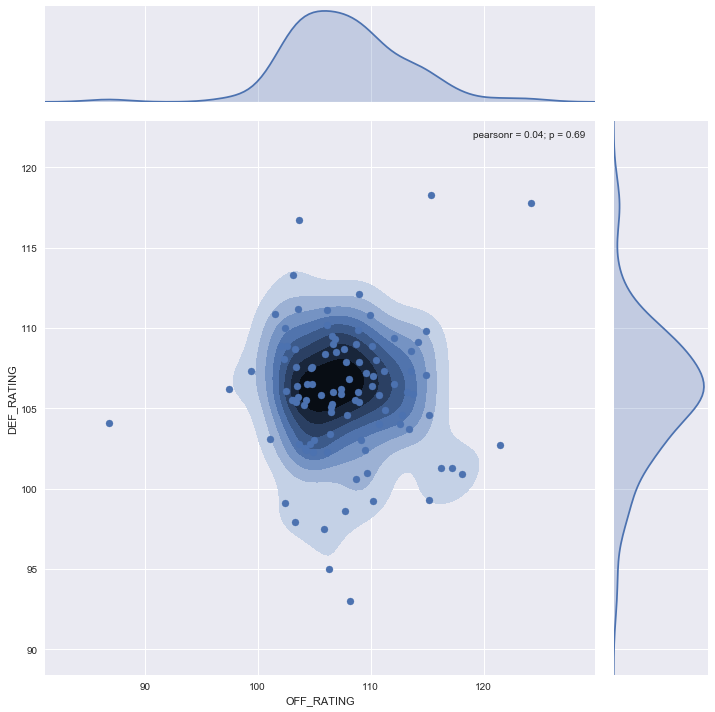

In [134]:
g = sns.jointplot(x="OFF_RATING", y="DEF_RATING", data=nba1, kind="kde", size=10)
g.plot_joint(plt.scatter)
g.ax_joint.collections[0].set_alpha(0)

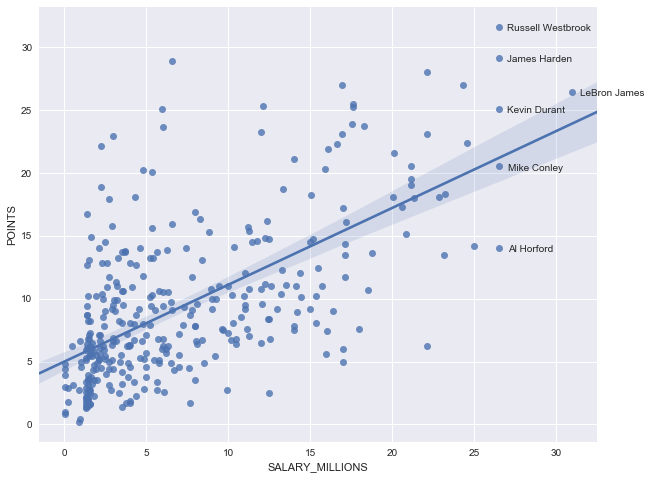

In [181]:
plt.figure(figsize=(10,8))
p1 = sns.regplot(x='SALARY_MILLIONS', y='POINTS', data=nba)

#labeled six highest-paid players
for n in range(0,6):
     p1.text(nba['SALARY_MILLIONS'][n]+0.5, nba['POINTS'][n]-0.3, nba['PLAYER'][n], horizontalalignment='left')

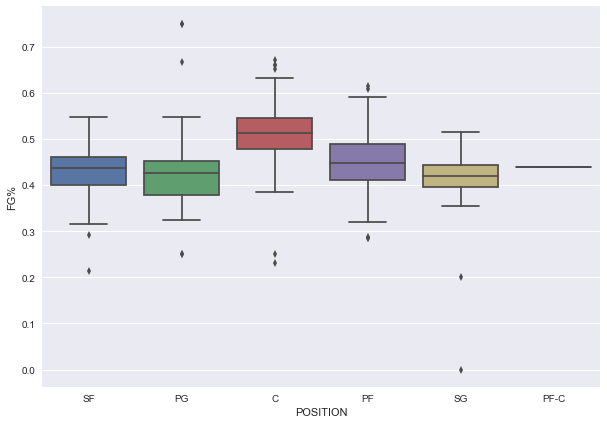

In [136]:
plt.figure(figsize=(10,7))
sns.boxplot(x='POSITION', y='FG%', data=nba)
plt.show()

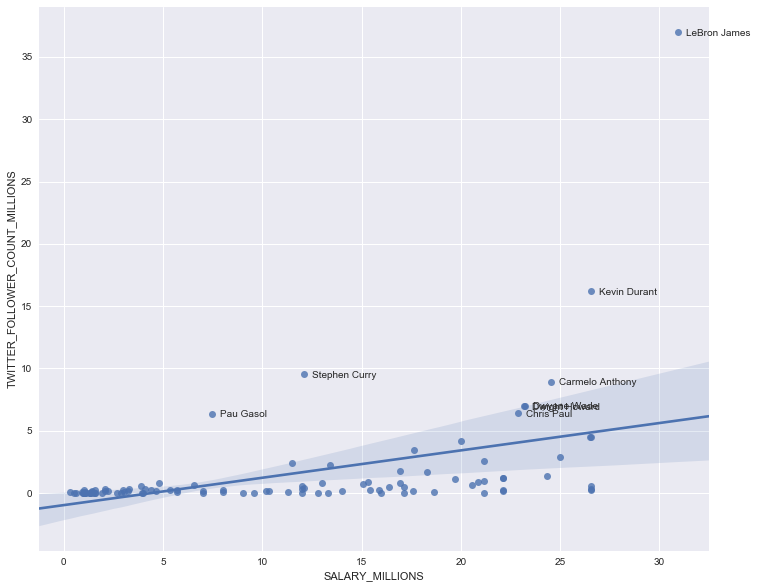

In [269]:
plt.figure(figsize=(12,10))
nba_top_twitter = nba1.sort_values('TWITTER_FOLLOWER_COUNT_MILLIONS', ascending=False)[:8]
nba_top_twitter = nba_top_twitter.reset_index()

g = sns.regplot(x='SALARY_MILLIONS', y='TWITTER_FOLLOWER_COUNT_MILLIONS', data=nba1)

for i, txt in enumerate(nba_top_twitter['PLAYER']):
    g.annotate(txt, (nba_top_twitter['SALARY_MILLIONS'][i]+0.4,nba_top_twitter['TWITTER_FOLLOWER_COUNT_MILLIONS'][i]-0.3))